#Attributes:
#### PEOPLE:

 ID: Customer's unique identifier

 Year_Birth: Customer's birth year

 Education: Customer's education level

 Marital_Status: Customer's marital status

 Income: Customer's yearly household income

 Kidhome: Number of children in customer's household

 Teenhome: Number of teenagers in customer's household

 Dt_Customer: Date of customer's enrollment with the company

 Recency: Number of days since customer's last purchase

 Complain: 1 if the customer complained in the last 2 years, 0 otherwise

 #### PRODUCTS:

  MntWines: Amount spent on wine in the last 2 years

  MntFruits: Amount spent on fruits in the last 2 years

  MntMeatProducts: Amount spent on meat in the last 2 years

  MntFishProducts: Amount spent on fish in the last 2 years

  MntSweetProducts: Amount spent on sweets in the last 2 years

  MntGoldProds: Amount spent on gold in the last 2 years

 #### PROMOTIONS:

   NumDealsPurchases: Number of purchases made with a discount

  AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise

  AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise

  AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise

  AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise

  AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise

   Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

####PLACE:

  NumWebPurchases: Number of purchases made through the company’s website

  NumCatalogPurchases: Number of purchases made using a catalog

  NumStorePurchases: Number of purchases made directly in stores

  NumWebVisitsMonth: Number of visits to the company’s website in the last month

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("marketing_campaign.csv", sep='\t')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 29)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

#preprocessing

In [ ]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[['Income']] = imputer.fit_transform(df[['Income']])
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


#EDA

<Figure size 1200x800 with 0 Axes>

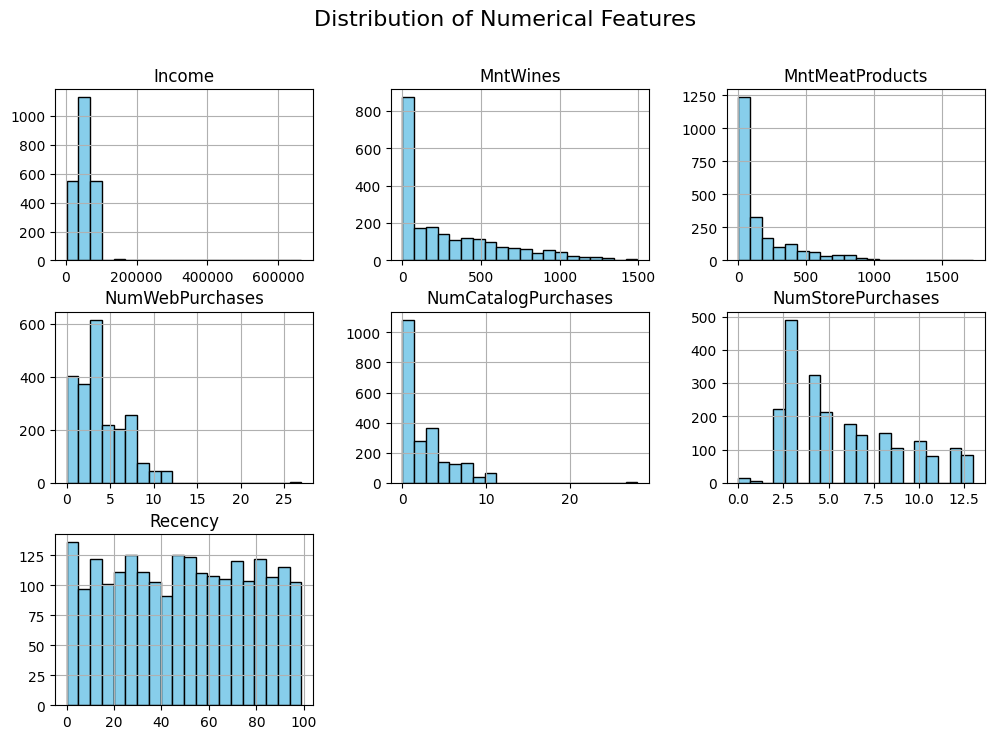

In [ ]:
# Selecting numerical columns
num_cols = ['Income', 'MntWines', 'MntMeatProducts', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Recency']

# Plot distribution of numerical features
plt.figure(figsize=(12, 8))
df[num_cols].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


<ipython-input-11-3041f96bdcac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Education', palette='pastel')


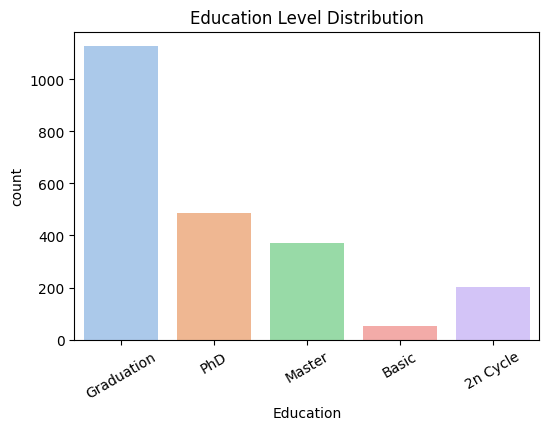

<ipython-input-11-3041f96bdcac>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Marital_Status', palette='pastel')


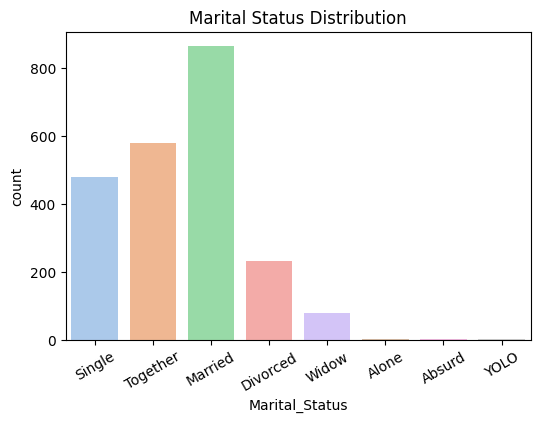

In [ ]:
#countplot for categorical variable
# Education Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Education', palette='pastel')
plt.title("Education Level Distribution")
plt.xticks(rotation=30)
plt.show()

# Marital Status Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Marital_Status', palette='pastel')
plt.title("Marital Status Distribution")
plt.xticks(rotation=30)
plt.show()


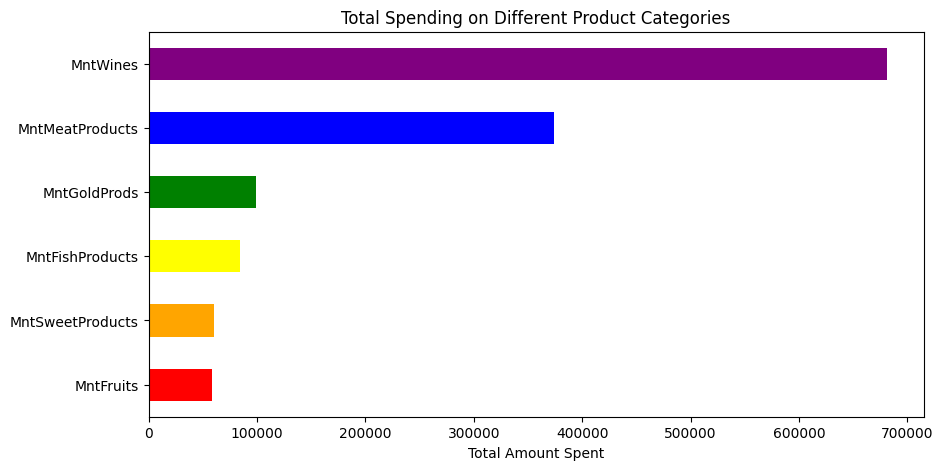

In [ ]:
# Spending Behavior Across Different Product Categories (Stacked Bar Plot)
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df[spending_cols].sum().sort_values().plot(kind='barh', figsize=(10, 5), color=['red', 'orange', 'yellow', 'green', 'blue', 'purple'])
plt.title("Total Spending on Different Product Categories")
plt.xlabel("Total Amount Spent")
plt.show()


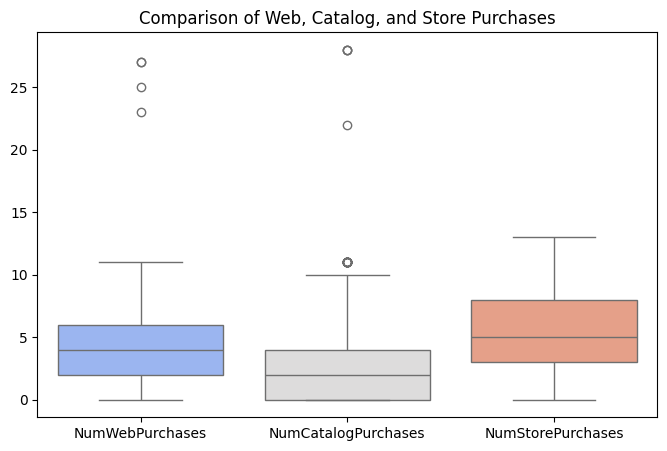

In [ ]:
#Customer Purchases: Online vs. Store (Bar Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']], palette='coolwarm')
plt.title("Comparison of Web, Catalog, and Store Purchases")
plt.show()


#Removing outlers and feature engineering

In [ ]:
# Calculate the number of days each customer has been with the company

df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format="%d-%m-%Y")
latest_date = df['Dt_Customer'].max()
df['Days_of_client'] = (latest_date - df['Dt_Customer']).dt.days
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_of_client
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,161


In [ ]:
df['Education'] = df['Education'].replace(['PhD', '2n Cycle', 'Graduation', 'Master'], 'PG')
df['Education'] = df['Education'].replace(['Basic'], 'UG')

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [ ]:
# Combining columns together to reduce number of dimensions
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [ ]:
# Select the necessary columns
df = df[['Education', 'Marital_Status', 'Income', 'Kids',
         'Days_of_client', 'Recency', 'Expenses', 'TotalNumPurchases',
         'TotalAcceptedCmp', 'Complain', 'Response']]

In [ ]:
# Categorize columns into three groups based on their data type
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
categorical_columns = [col for col in df.columns if 2 < df[col].nunique() < 10]
numerical_columns = [col for col in df.select_dtypes(include=['number']).columns
                     if col not in binary_columns + categorical_columns]

In [ ]:
df.shape

(2240, 11)

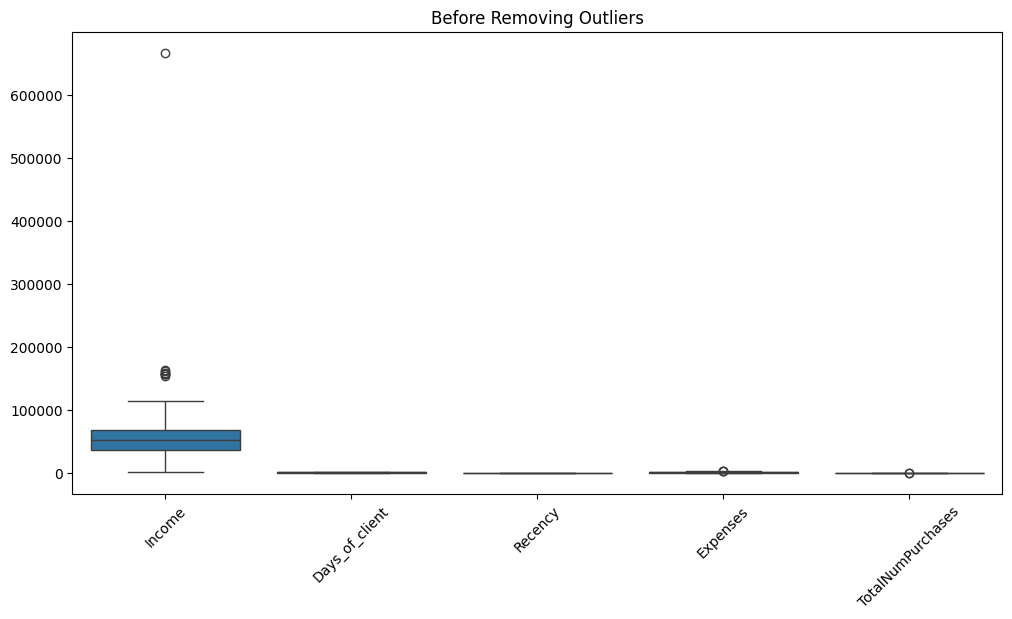

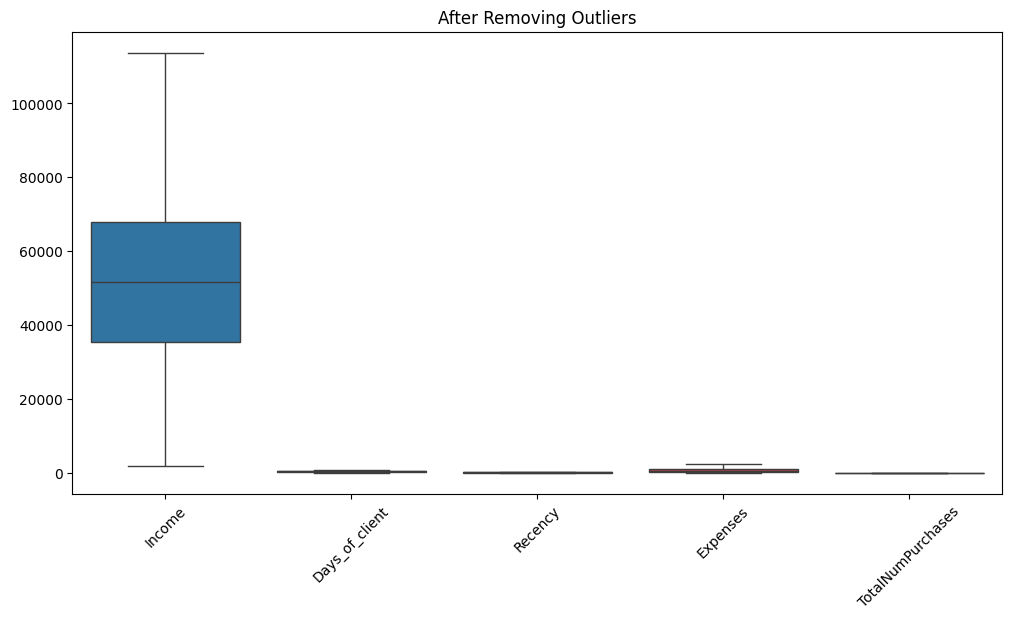

Original DataFrame shape: 2240
Filtered DataFrame shape: 2225
Number of outliers removed: 15


In [ ]:
# Plot before removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Income', 'Days_of_client', 'Recency', 'Expenses', 'TotalNumPurchases']])
plt.title("Before Removing Outliers")
plt.xticks(rotation=45)
plt.show()

from scipy import stats
z_scores = np.abs(stats.zscore(df[['Income', 'Days_of_client', 'Recency', 'Expenses', 'TotalNumPurchases']]))
outliers = df[(z_scores > 3).any(axis=1)]
df_cleaned = df.drop(outliers.index)


plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[['Income', 'Days_of_client', 'Recency', 'Expenses', 'TotalNumPurchases']])
plt.title("After Removing Outliers")
plt.xticks(rotation=45)
plt.show()

print("Original DataFrame shape:", df.shape[0])
print("Filtered DataFrame shape:", df_cleaned.shape[0])
print("Number of outliers removed:", df.shape[0] - df_cleaned.shape[0])

#Data preprocessing

In [ ]:
cat_df = list(df.select_dtypes(include=["object"]).columns)
print(cat_df)

['Education', 'Marital_Status']


In [ ]:
# label encoding for the categorical columns
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in df:
    if df[col].dtype == 'object':
        df[col] = LE.fit_transform(df[col])

In [ ]:
print(df.info)

<bound method DataFrame.info of       Education  Marital_Status   Income  Kids  Days_of_client  Recency  \
0             0               0  58138.0     0             663       58   
1             0               0  46344.0     2             113       38   
2             0               1  71613.0     0             312       26   
3             0               1  26646.0     1             139       26   
4             0               1  58293.0     1             161       94   
...         ...             ...      ...   ...             ...      ...   
2235          0               1  61223.0     1             381       46   
2236          0               1  64014.0     3              19       56   
2237          0               0  56981.0     0             155       91   
2238          0               1  69245.0     1             156        8   
2239          0               1  52869.0     2             622       40   

      Expenses  TotalNumPurchases  TotalAcceptedCmp  Complain  Resp

In [ ]:
#Creating a copy of data
import pandas as pd
from sklearn.preprocessing import StandardScaler
ds = df.copy()
cols_del = ['Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Marital_Status,Income,Kids,Days_of_client,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp
0,-0.157171,-1.346874,0.235327,-1.264505,1.531185,0.307039,1.679417,1.320826,-0.439037
1,-0.157171,-1.346874,-0.235826,1.396361,-1.190545,-0.383664,-0.961275,-1.154596,-0.439037
2,-0.157171,0.742460,0.773633,-1.264505,-0.205773,-0.798086,0.282673,0.799685,-0.439037
3,-0.157171,0.742460,-1.022732,0.065928,-1.061881,-0.798086,-0.918094,-0.894025,-0.439037
4,-0.157171,0.742460,0.241519,0.065928,-0.953012,1.550305,-0.305254,0.539114,-0.439037


#Dimensionality Reduction

In [ ]:
#Initiating PCA to reduce dimentions features to 3
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["Expenses","Income", "TotalNumPurchases"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Expenses,2240.0,-3.172066e-18,1.686716,-2.868302,-1.502400,-0.254863,1.324771,10.578971
Income,2240.0,-2.379049e-17,1.055395,-5.402945,-0.648718,-0.096540,0.489975,5.810731
TotalNumPurchases,2240.0,1.586033e-18,1.030472,-3.959493,-0.631833,0.037244,0.688795,3.063389


In [ ]:
PCA_ds.head()

,Expenses,Income,TotalNumPurchases
0,2.129393,1.549937,0.665503
1,-1.885383,-1.048849,-0.641845
2,1.166441,-0.246772,-0.377774
3,-1.673448,-0.873907,-0.764402
4,-0.036931,-0.714411,0.691165


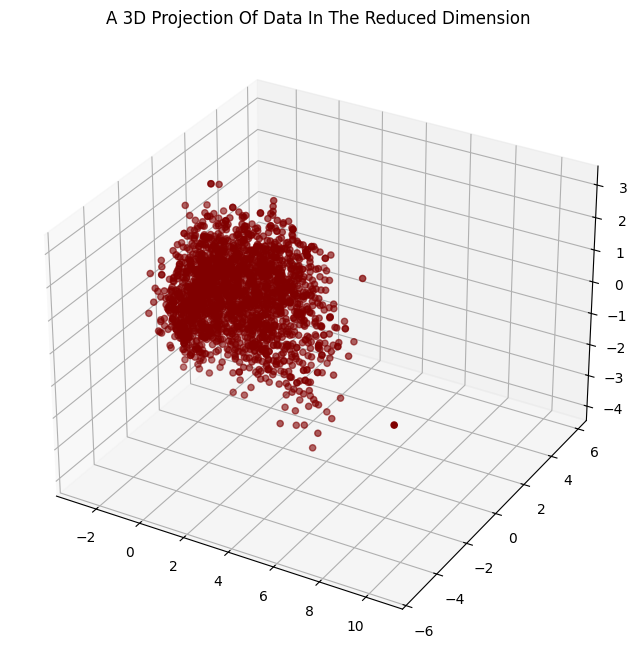

In [ ]:
#3D Projection Of Data In The Reduced Dimension
x =PCA_ds["Expenses"]
y =PCA_ds["Income"]
z =PCA_ds["TotalNumPurchases"]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

#Clustering

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

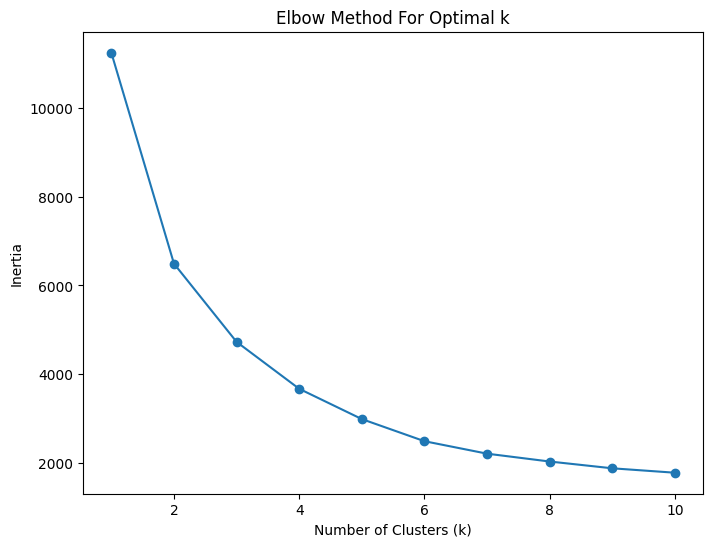

In [ ]:
#elbow
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(PCA_ds[['Expenses', 'Income', 'TotalNumPurchases']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

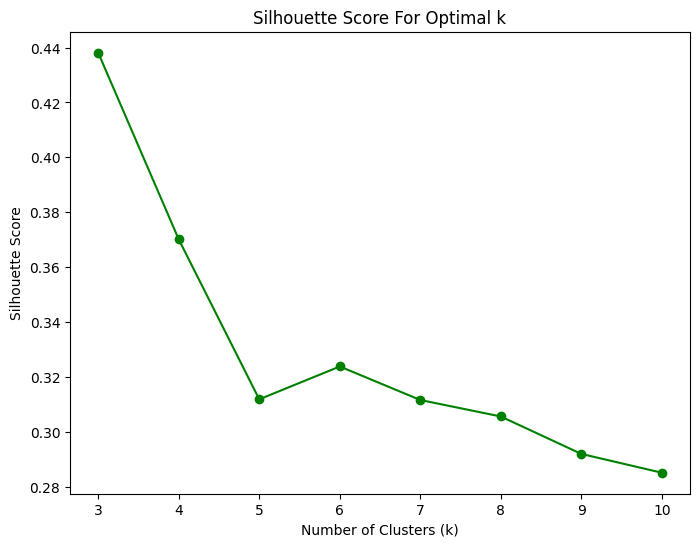

In [ ]:
#silhoutee score
sil_scores = []
for k in k_range[2:]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(PCA_ds[['Expenses', 'Income', 'TotalNumPurchases']])
    sil_score = silhouette_score(PCA_ds[['Expenses', 'Income', 'TotalNumPurchases']], kmeans.labels_)
    sil_scores.append(sil_score)

# Plot Silhouette Score for different k values
plt.figure(figsize=(8, 6))
plt.plot(k_range[2:], sil_scores, marker='o', color='green')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

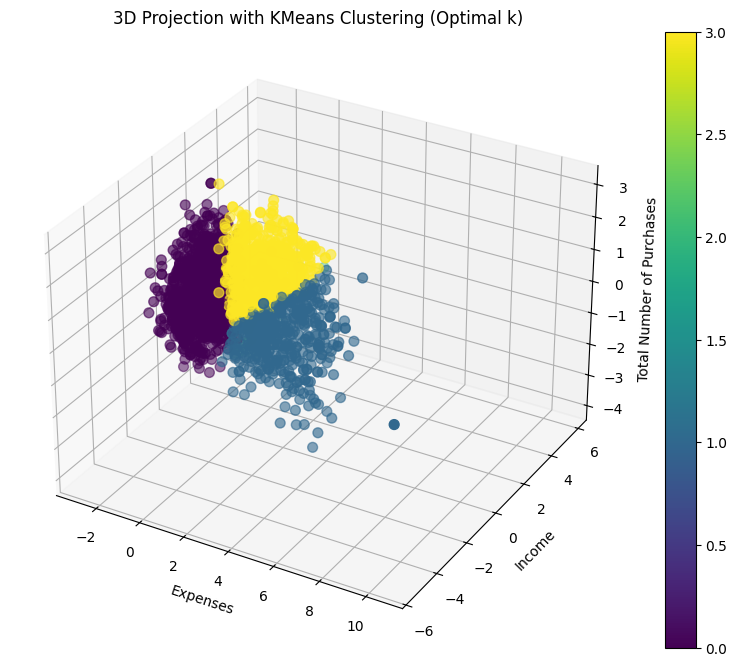

In [ ]:
#k-means
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
PCA_ds['Clusters'] = kmeans.fit_predict(PCA_ds[['Expenses', 'Income', 'TotalNumPurchases']])

x = PCA_ds['Expenses']
y = PCA_ds['Income']
z = PCA_ds['TotalNumPurchases']
clusters = PCA_ds['Clusters']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=clusters, cmap='viridis', marker='o', s=50)

ax.set_title("3D Projection with KMeans Clustering (Optimal k)")
ax.set_xlabel("Expenses")
ax.set_ylabel("Income")
ax.set_zlabel("Total Number of Purchases")
fig.colorbar(scatter)
plt.show()

In [ ]:
#Initiating the Agglomerative Clustering model
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
df["Clusters"]= yhat_AC

In [ ]:
income = PCA_ds["Income"]
expenses = PCA_ds["Expenses"]
clusters = PCA_ds["Clusters"]

!pip install plotly
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(
    x=income,
    y=expenses,
    mode='markers',
    marker=dict(
        size=6,
        color=clusters,
        colorscale='Viridis',
        opacity=0.8


    )
))

fig.update_layout(
    title='Clusters of Customers',
    xaxis_title='Income',
    yaxis_title='Expenses',
    width=800,
    height=600,
    plot_bgcolor='rgba(235, 235, 235, 0.8)',
)

fig.show()

cluster 0- Yellow Cluster (High Expenses, Low Income)

cluster 1- Purple Cluster (Moderate Income, Moderate Expenses)

cluster 2-Blue Cluster (Low Expenses, Low Income)

cluster 3- Green Cluster (High Income, Low Expenses)

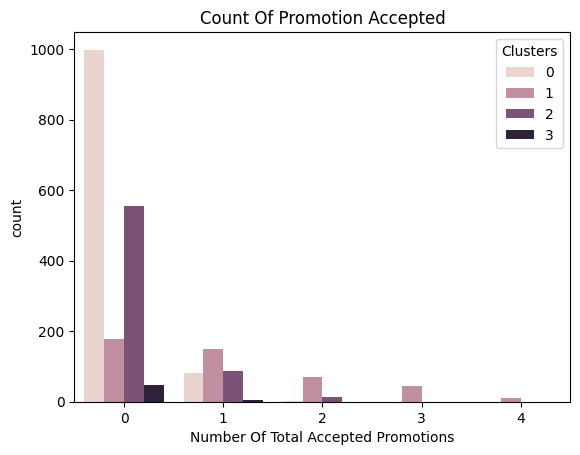

In [ ]:
#Plotting count of total campaign accepted.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
pl = sns.countplot(x=df["TotalAcceptedCmp"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

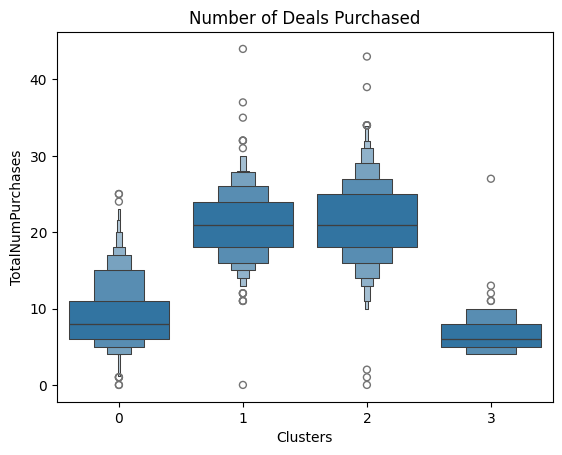

In [ ]:
#Plotting the number of deals purchased
plt.figure()
# Calculate TotalNumPurchases if it doesn't exist in df
pl=sns.boxenplot(y=df["TotalNumPurchases"],x=df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

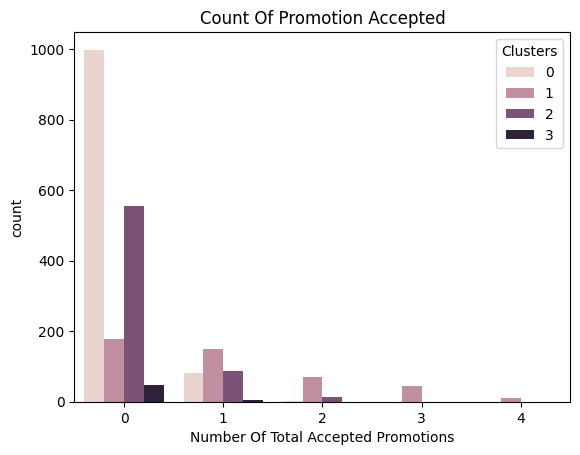

In [ ]:
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["TotalAcceptedCmp"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

In [ ]:
import pickle

# Save the trained KMeans model
with open("kmeans_model.pkl", "wb") as file:
    pickle.dump(kmeans, file)

print("Model saved successfully!")


Model saved successfully!


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df.drop(columns=["Income"])
y = df["Income"]
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regression Model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predictions
y_pred = regressor.predict(X_test)

# Evaluation Metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 7064.596025798576
MSE: 126017856.3959205
R2 Score: 0.7042837918329654
